## &#128205; Basic Setups

In [1]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [2]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

'C:\\Users\\kw375\\Growth-Hackers-Quest\\kyungwon_GH_Quest'

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [26]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [27]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [28]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [29]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [30]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [31]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [32]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [33]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. QUEST

### 3.1 

연령대(ex.10,20,30,40대) 변수와 함께 어떤 변수와의 관계를 보면 좋을지 기대 가설을 세우고, 적절한 방식으로 시각화 후 해석 보태 주세요.
연령은 25세, 26세~ 아닌 20대의 BIN 형태 연령대 (범주형 변수)로 묶어주세요.

[참고](https://nittaku.tistory.com/124)

In [34]:
#생년 월일(birth year)의 빈도표
df['birth_year'].value_counts()

1969    7980
1988    2661
1990    2621
1989    2600
1991    2564
        ... 
1894       1
1895       1
1938       1
1918       1
1885       1
Name: birth_year, Length: 84, dtype: int64

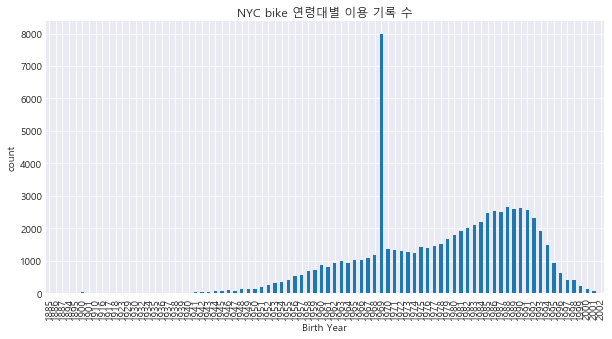

In [35]:
#연령대 순으로 x축에 따라 정렬
plt.figure(figsize=(10,5))

df['birth_year'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('Birth Year')
plt.ylabel('count')
plt.title('NYC bike 연령대별 이용 기록 수')

plt.show()

In [40]:
#우선 연령대별로 보자. 2018년 기준
df.loc[(df['birth_year'] <= 2002) & (df['birth_year'] >= 2000), 'age'] = 10
df.loc[(df['birth_year'] <= 1999) & (df['birth_year'] >= 1990), 'age'] = 20
df.loc[(df['birth_year'] <= 1989) & (df['birth_year'] >= 1980), 'age'] = 30
df.loc[(df['birth_year'] <= 1979) & (df['birth_year'] >= 1970), 'age'] = 40
df.loc[(df['birth_year'] <= 1969) & (df['birth_year'] >= 1960), 'age'] = 50
df.loc[(df['birth_year'] <= 1959) & (df['birth_year'] >= 1950), 'age'] = 60
df.loc[(df['birth_year'] <= 1949) & (df['birth_year'] >= 1940), 'age'] = 70
df.loc[(df['birth_year'] <= 1939) & (df['birth_year'] >= 1930), 'age'] = 80
df.loc[(df['birth_year'] <= 1929) & (df['birth_year'] >= 1920), 'age'] = 90
df.loc[(df['birth_year'] <= 1919), 'age'] = 100 #100세 이상은 한 범주로 묶었다.

df.head(10)

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,age,loc2
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36,70,70.0
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29,20,NaN
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,60,60.0
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,50,50.0
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,50,50.0
5,2018-05-01,2018-05-01,4,4,402,492,W 33 St & 7 Ave,40.750200,-73.990931,3443,W 52 St & 6 Ave,40.761330,-73.979820,25151,Subscriber,1967,male,16,50,50.0
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,40,40.0
7,2018-05-01,2018-05-01,1,1,382,3158,W 63 St & Broadway,40.771639,-73.982614,3172,W 74 St & Columbus Ave,40.778567,-73.977550,26354,Subscriber,1971,male,11,40,40.0
8,2018-05-01,2018-05-01,0,1,523,3659,W 17 St & 9 Ave,40.742949,-74.004137,267,Broadway & W 36 St,40.750977,-73.987654,17617,Subscriber,1980,male,41,30,30.0
9,2018-05-01,2018-05-01,2,2,90,3351,E 102 St & 1 Ave,40.786995,-73.941648,3391,E 106 St & 1 Ave,40.789253,-73.939562,29386,Subscriber,1984,male,53,30,30.0


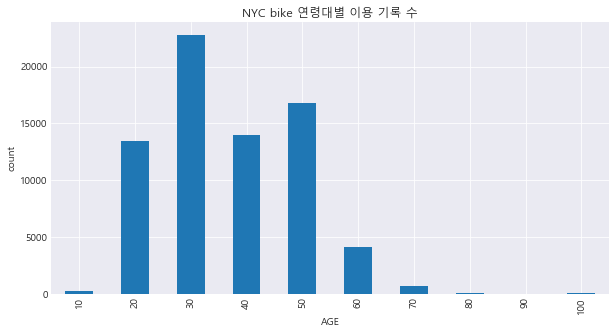

In [42]:
#연령대 순으로 x축에 따라 정렬 (이번에는 범주형으로 그려보기)
plt.figure(figsize=(10,5))

df['age'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('AGE')
plt.ylabel('count')
plt.title('NYC bike 연령대별 이용 기록 수')

plt.show()

In [45]:
#trip_duration을 이용하기 위해서는 이상치를 제거한 trip_duration을 이용하는 것이 좋다.
df['trip_duration_min']=df['trip_duration'] /60
cut_point = df["trip_duration_min"].quantile(0.99) # 상위 99% 값을 cut_point로 지정
df_cut=df[df['trip_duration_min'] < cut_point]
#앞으로 EDA는 df_cut으로만 활용해서 할 것이다. 

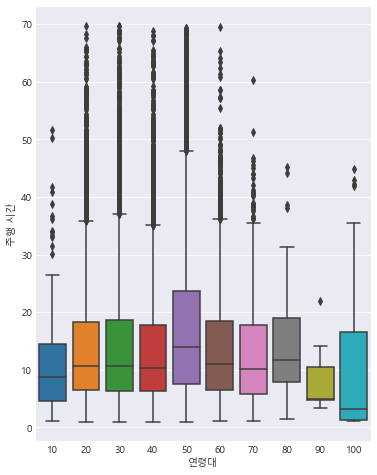

In [47]:
#이제 이진 변수 분석을 해보자. 범주형 X 연속형이므로 범주별 histogram과 누적 막대 그래프로 plotting을 하는 것이 좋다
#연령대 age와 주행시간 trip_duration
plt.figure(figsize = (6, 8))
box = sns.boxplot(x='age', y='trip_duration_min', data=df_cut)
box.set_xlabel('연령대')
box.set_ylabel('주행 시간')
plt.show()

**해석 보태기**
> 기대가설 : 연령대에 따라서 trip_duration이 다르지 않을까? 어떻게 다를까?

50대의 주행시간 중앙값과 4분위수가 제일 높은 것을 확인할 수 있다. 전반적으로 제일 긴 주행시간을 나타내고 있는 50대를 제외하고는 나머지 연령대에서는 그렇게 큰 차이가 나타나지는 않았다. 특이점을 통해 알아볼 수 있는 것은 10대, 70대, 80대, 90대, 100대 이상의 이용자들은 특이점이 다른 연령대에 비해 비교적 적은 것으로 보아 주행시간이 고르게 분포되어 있는데에 비해 다른 연령대들은 특이점이 많은 것으로 보아 다양한 주행 시간을 나타내고 있는 것을 알 수 있다.  

### 3.2

Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. trip_duration은 평균(mean)이어도 좋고, 누적(sum)이어도 좋습니다. 해석 보태 주세요.
Groupby 함수 사용해주시면 편합니다.



In [91]:
dt = df_cut[['bike_id','trip_duration_min']]
dt_cut = dt.groupby('bike_id', as_index = False).mean()
dt_cut

,bike_id,trip_duration_min,age
0,14529,17.762500,35.000000
1,14530,14.506250,36.250000
2,14532,27.650000,32.500000
3,14533,17.542857,34.285714
4,14534,9.933333,40.000000
...,...,...,...
10124,33551,15.696667,34.000000
10125,33582,19.296296,37.777778
10126,33639,13.214286,37.142857
10127,33645,14.950000,41.538462


In [82]:
#범주형 변수가 30개 이상일 때, 빈도표 그리기
dt_cut['trip_duration_min'].head(20)

bike_id
14529    17.762500
14530    14.506250
14532    27.650000
14533    17.542857
14534     9.933333
14537    22.240000
14540    16.375000
14541    15.992424
14545    22.325000
14547    14.195833
14550    14.355556
14551     8.291667
14552    26.945833
14553    13.890000
14555    30.444444
14556    11.118519
14558    17.908333
14561    28.591667
14562    11.450000
14563     3.366667
Name: trip_duration_min, dtype: float64

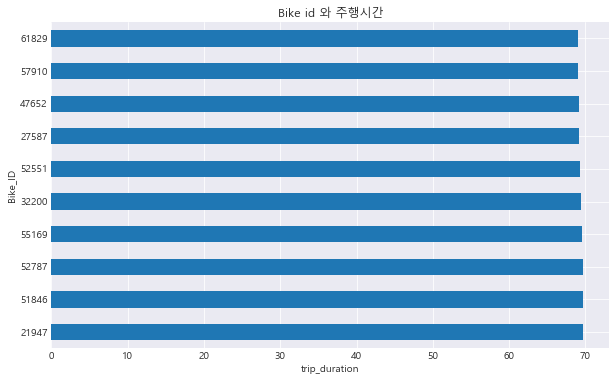

In [85]:
plt.figure(figsize=(10,6))
df_cut['trip_duration_min'].nlargest(10).plot(kind='barh')
plt.xlabel('trip_duration의 평균')
plt.ylabel('Bike_ID')
plt.title('Bike id 와 주행시간')
plt.show()

**해석 보태기**
>bike_id는 범주형 변수로 우선 groupby함수를 이용해서 각 bike id별 trip_duration_min의 평균과 sum 중 mean을 이용해서 group화 하였다. 상위 10개의 데이터만을 보면 데이터 시각화의 의미가 없게 특징이 없다. 알아낼 수 있는 것이라고는 trip_duration이 70분 근처에 상위 bike id가 분포하고 있으며 bike id는 다양한 것으로 파악해 볼 수 있다.

### 3.3

Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 해석은 안 보태 주셔도 됩니다.

In [100]:
plt.figure(figsize = (10, 6))
dt = df_cut[['bike_id','trip_duration_min', 'age']]
dt_cut = dt.groupby('bike_id', as_index = False).mean()
dt_cut

,bike_id,trip_duration_min,age
0,14529,17.762500,35.000000
1,14530,14.506250,36.250000
2,14532,27.650000,32.500000
3,14533,17.542857,34.285714
4,14534,9.933333,40.000000
...,...,...,...
10124,33551,15.696667,34.000000
10125,33582,19.296296,37.777778
10126,33639,13.214286,37.142857
10127,33645,14.950000,41.538462


<Figure size 720x432 with 0 Axes>

In [112]:
top_list = dt_cut['trip_duration_min'].value_counts().nlargest(20).index
df_top = dt_cut[dt_cut['trip_duration_min'].isin(top_list)]
df_top.shape

(106, 3)

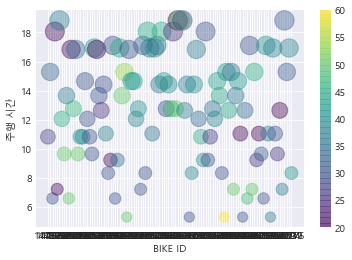

In [113]:
#상위 10개 bike_id/ 주행시간 평균/ 연령대 
plt.scatter(df_top['bike_id'], # x축
            df_top['trip_duration_min'], # y축
            c=df_top['age'], # 색상 bubble chart는 색상이 데이터이다.
            s=20*df_top['trip_duration_min'], # 사이즈 
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            # 한번 지워보기
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('주행 시간')
plt.xlabel('BIKE ID')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()